#Practica 3: Regresión lineal en contexto de series de tiempo

Analisis de serie de tiempo con regresión lineal.

Dataset: Global Traffic Accidents
Un dataset con accidentes de trafico documentados en diversas partes del mundo en diferentes epocas.


## Selección de librerias

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

#  Importado del Dataset y trasnformacion a serie de tiempo

In [21]:
file_path = "global_traffic_accidents.csv"
df = pd.read_csv(file_path)

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df_time_series = df.groupby('Date').size().reset_index(name='Accident Count')

## Visualización del dataset

<ipython-input-23-2fd6282aff63>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


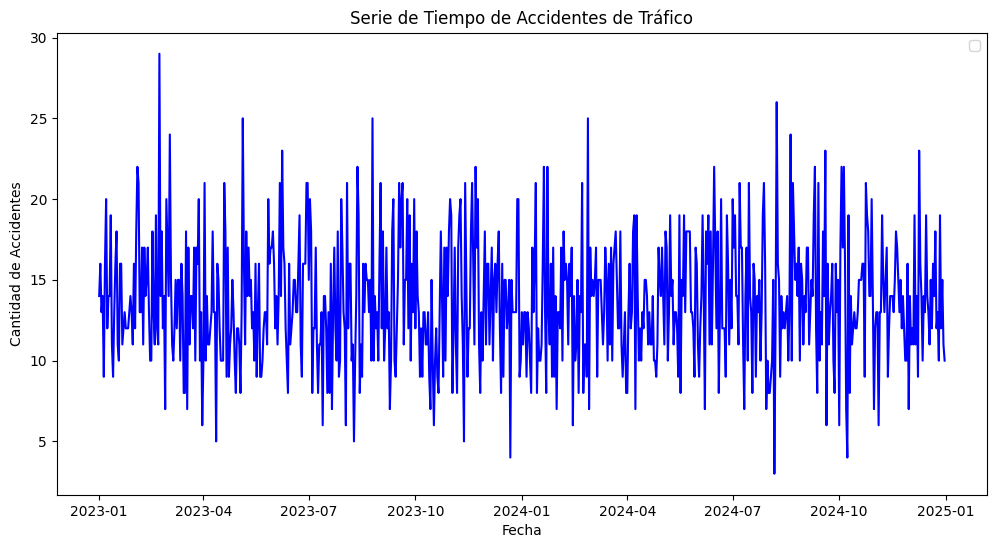

In [23]:

plt.figure(figsize=(12,6))
plt.plot(df_time_series['Date'], df_time_series['Accident Count'], color='blue')
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Accidentes")
plt.title("Serie de Tiempo de Accidentes de Tráfico")
plt.legend()
plt.show()


#Modelo estadistico para la regresión lineal

In [24]:
X = sm.add_constant(range(len(df_time_series)))
y = df_time_series['Accident Count']
modelo_rl = sm.OLS(y, X).fit()

# Prueba de estacionariedad

In [25]:
resultado_adf = adfuller(df_time_series['Accident Count'])
print("Prueba de Dickey-Fuller:")
print(f"Estadístico ADF: {resultado_adf[0]}")
print(f"Valor P: {resultado_adf[1]}")

Prueba de Dickey-Fuller:
Estadístico ADF: -26.921815539458507
Valor P: 0.0


Por lo tanto, es estacionaria.

# Aplicacion del modelo ARIMA


In [26]:
modelo_arima = ARIMA(df_time_series['Accident Count'], order=(5,1,0))
modelo_arima_fit = modelo_arima.fit()
#Predicción de ARIMA
predicciones_arima = modelo_arima_fit.predict(start=0, end=len(df_time_series)-1, dynamic=False)

## Visualización de la predicción

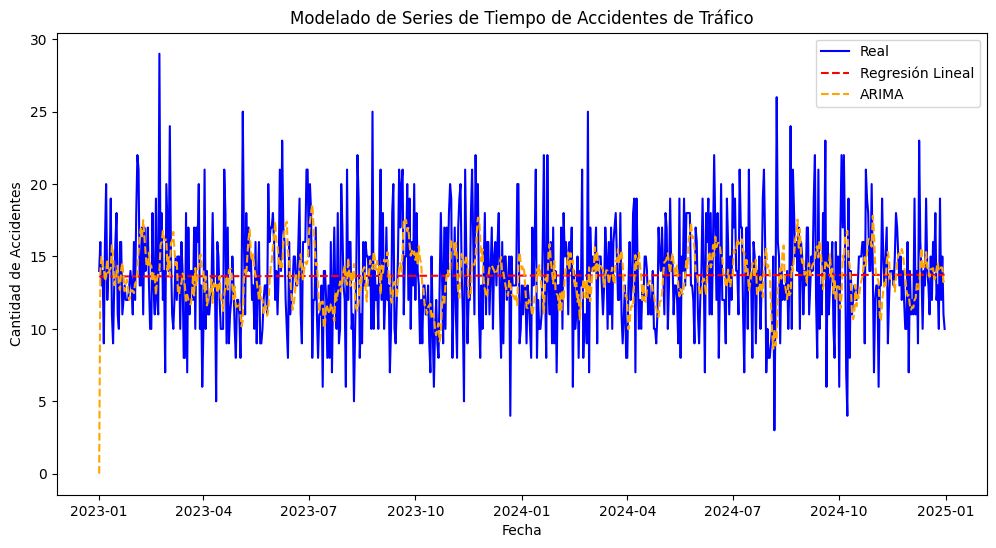

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df_time_series['Date'], df_time_series['Accident Count'], label="Real", color='blue')
plt.plot(df_time_series['Date'], modelo_rl.predict(X), label="Regresión Lineal", linestyle="--", color='red')
plt.plot(df_time_series['Date'], predicciones_arima, label="ARIMA", linestyle="--", color='orange')
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Accidentes")
plt.title("Modelado de Series de Tiempo de Accidentes de Tráfico")
plt.legend()
plt.show()